In [2]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS


In [3]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleanedReviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

df.head()

reviews  stars        date  \
0  ✅ Trip Verified |  I flew London to Malaga on ...      5  2023-08-30   
1  ✅ Trip Verified |  I arrived at the airport ab...      1  2023-08-30   
2  ✅ Trip Verified |  Filthy plane, cabin staff o...      1  2023-08-28   
3  ✅ Trip Verified |   Chaos at Terminal 5 with B...      1  2023-08-27   
4  Not Verified |  BA cancelled our flight and co...      3  2023-08-27   

          country  verified                                             corpus  
0  United Kingdom      True  flew london malaga august club europe stood ar...  
1         Germany      True  arrived airport hour takeoff time get checked ...  
2  United Kingdom      True  filthy plane cabin staff ok appalling customer...  
3  United Kingdom      True  chaos terminal ba cancellation delay staff giv...  
4  United Kingdom     False  verified ba cancelled flight could book u onto...

In [4]:
#average rating for british Airways

df.stars.mean()

4.752480705622933

Text(0.5, 0.98, 'Counts for each ratings')

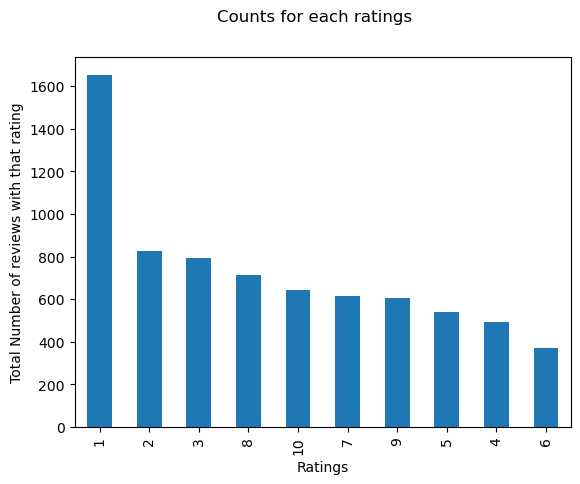

In [5]:
#total count for each rating
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [6]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [7]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [8]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [9]:
df_ratings

Stars  total_counts  pct_values
0      1          1653       22.78
1      2           828       11.41
2      3           795       10.96
3      8           715        9.85
4     10           642        8.85
5      7           613        8.45
6      9           608        8.38
7      5           539        7.43
8      4           493        6.79
9      6           370        5.10

Text(0.5, 1.0, 'Total Counts for each Rating')

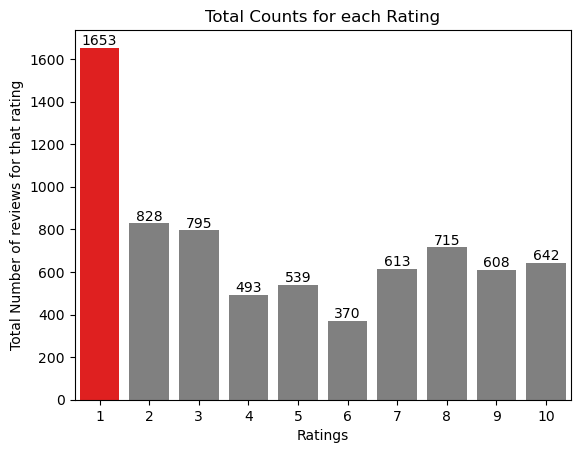

In [37]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews for that rating")
ax.set_title("Total Counts for each Rating")


In [11]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

71 unique countries


In [12]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

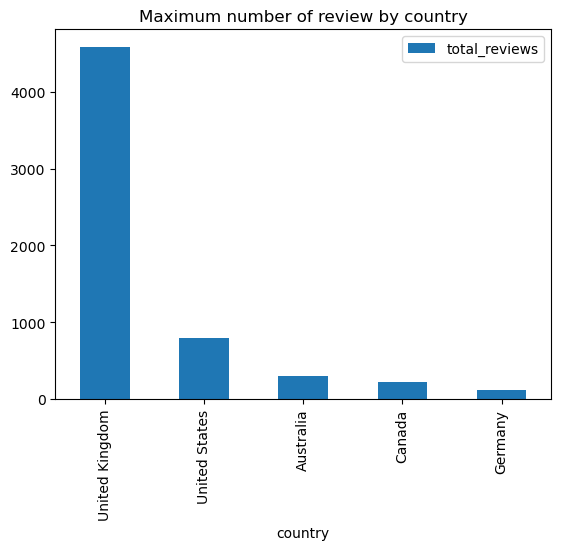

In [13]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

In [14]:
#df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()

df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

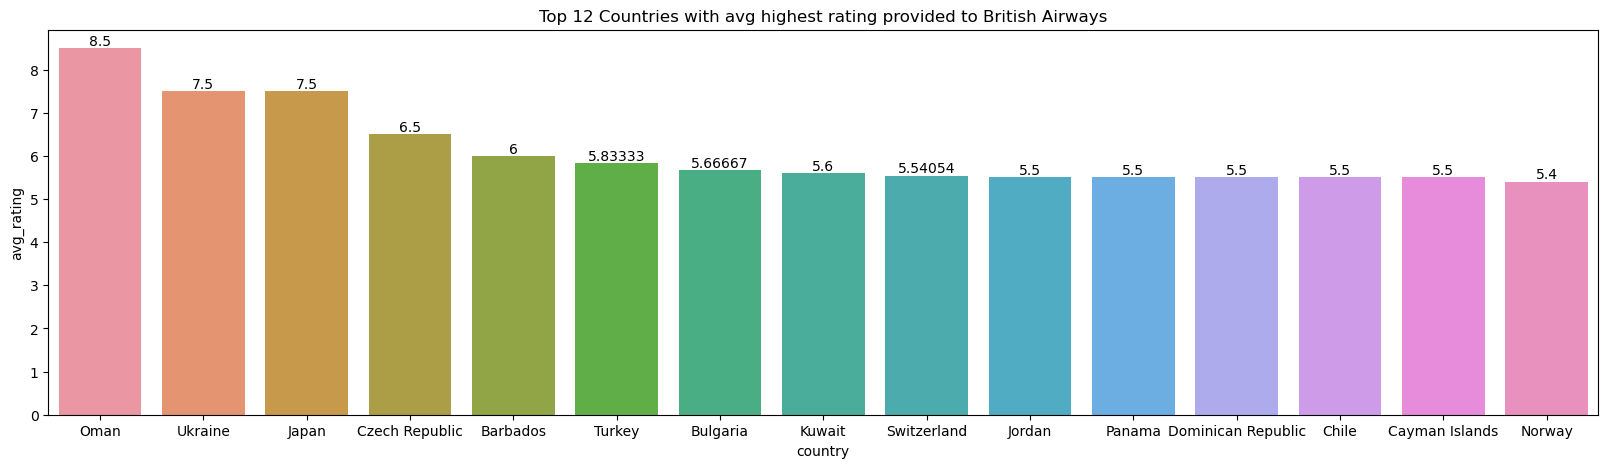

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:15])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [16]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [17]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [18]:
#It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

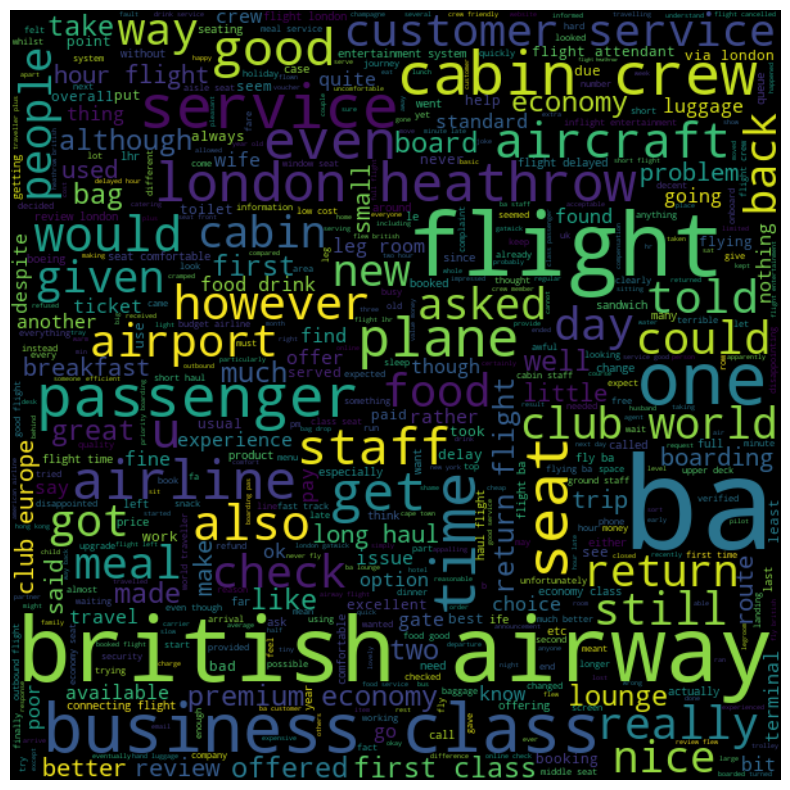

In [19]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

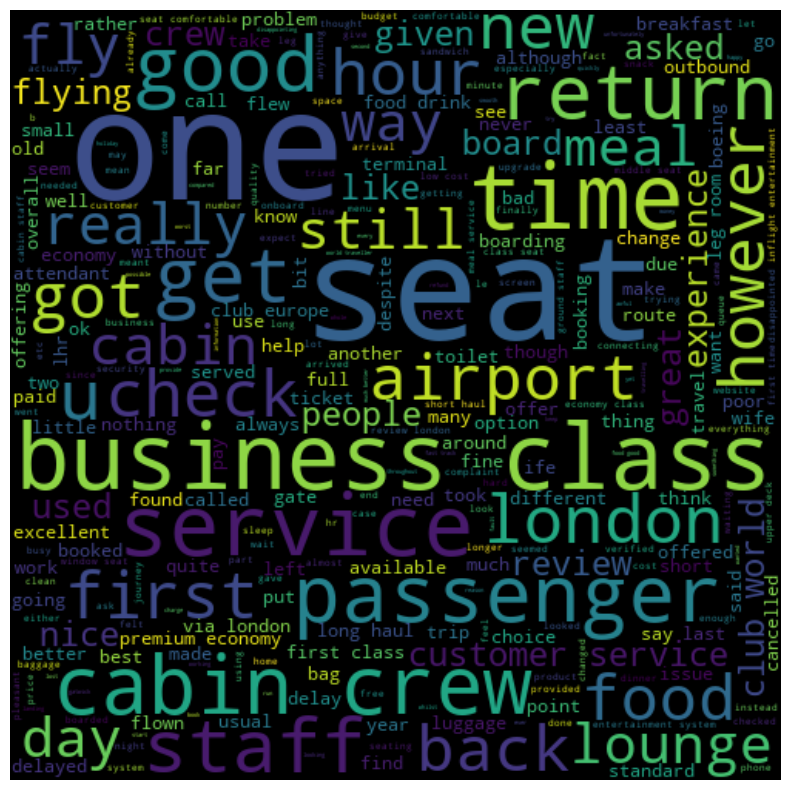

In [20]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

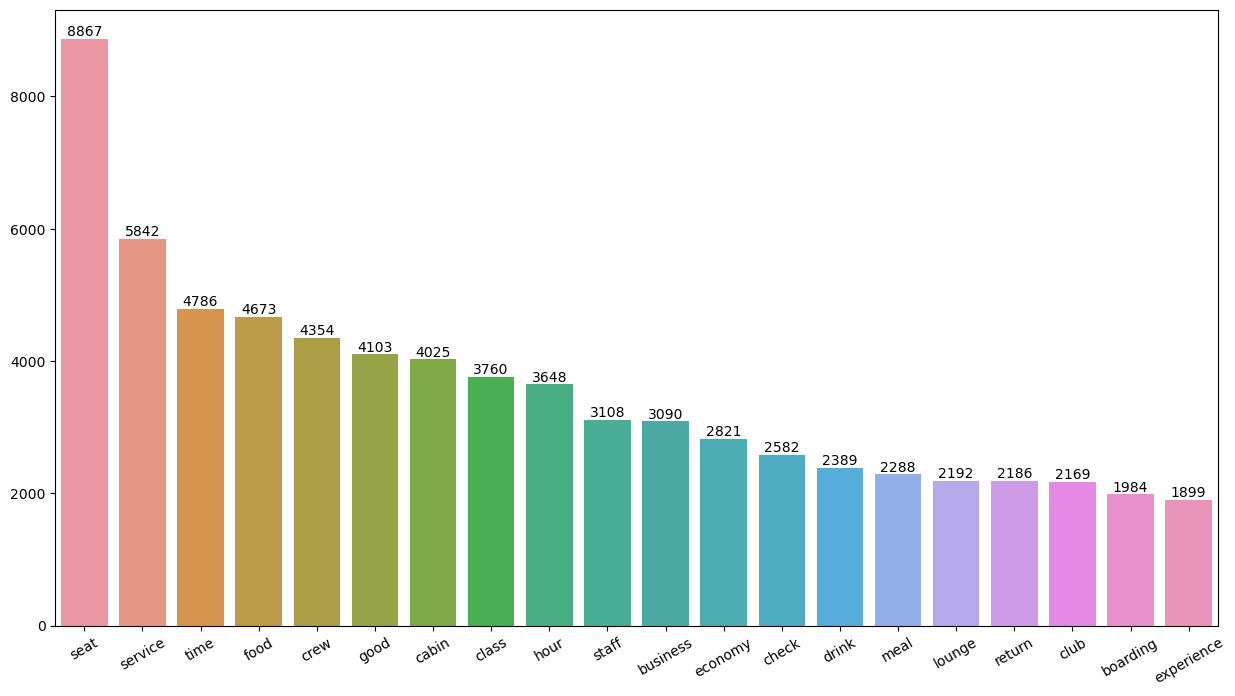

In [22]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

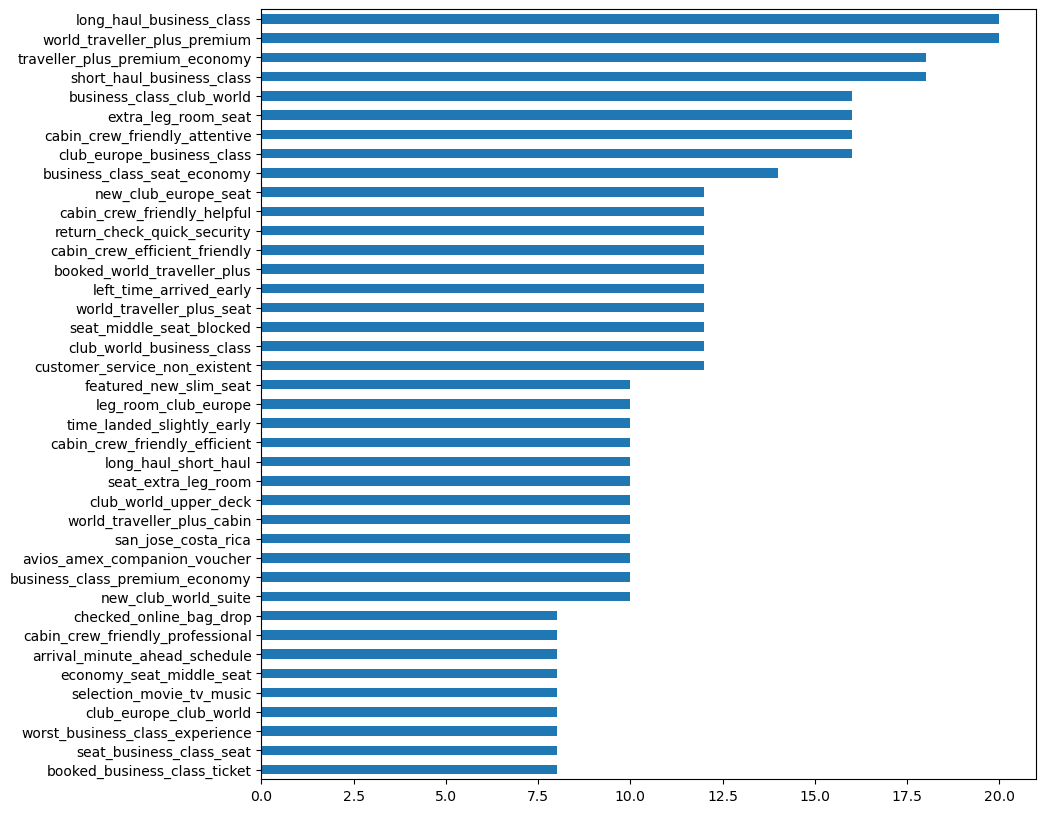

In [23]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [24]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

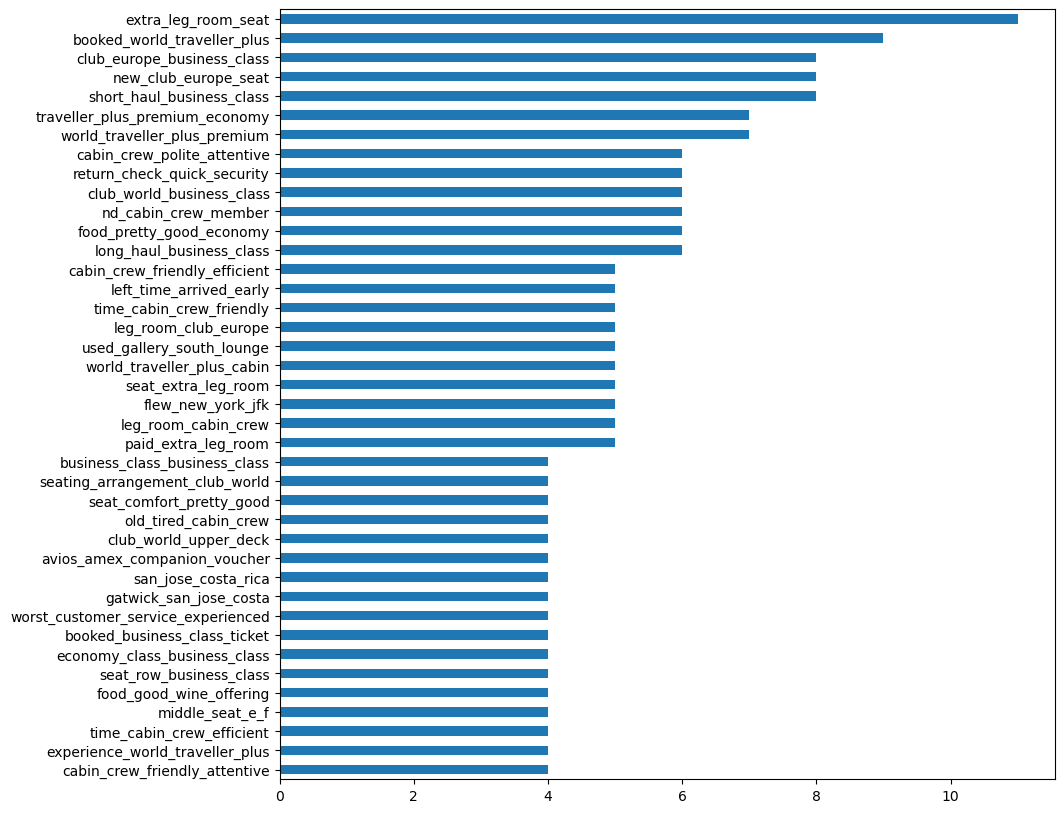

In [25]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

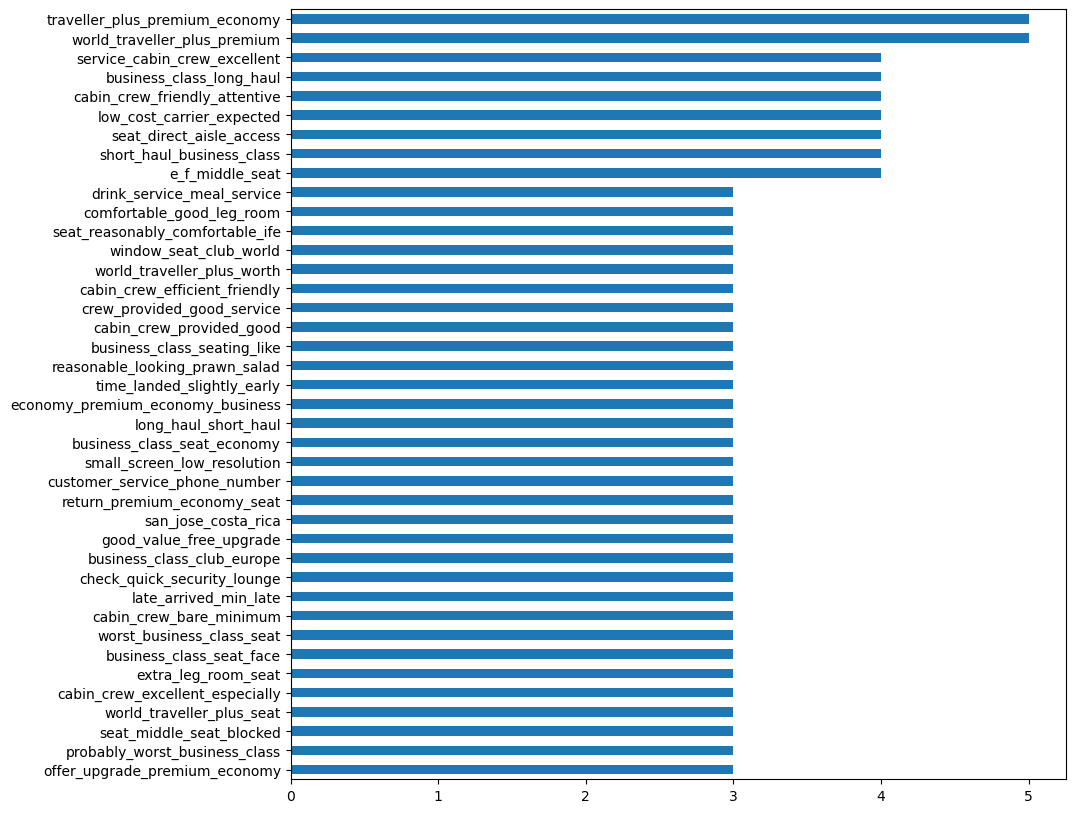

In [26]:

new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

In [27]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [28]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


4879 number of reviews between -0.2 and 0.2 polarity score
2822 number of reviews between -0.1 and 0.1 polarity score


In [29]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

df.label.value_counts()

 1    4678
-1    2332
 0     246
Name: label, dtype: int64

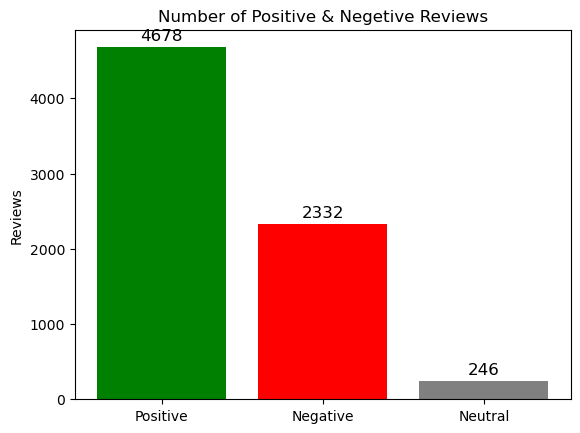

In [44]:

import matplotlib.pyplot as plt

# Count the occurrences of each sentiment label
label_counts = df['label'].value_counts()

# Create a bar plot
plt.bar(['Positive', 'Negative', 'Neutral'], label_counts.values, color=['green', 'red', 'gray'])

# Add labels and title
#plt.xlabel('Sentiment Label')
plt.ylabel('Reviews')
plt.title('Number of Positive & Negetive Reviews')

# Add counts above each bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()



In [32]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vect = CountVectorizer()

# Apply transformation
tf = vect.fit_transform(df.corpus).toarray()

# Get feature names
tf_feature_names = vect.get_feature_names_out()


In [33]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [35]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        flight          1309.1            ba          1714.1        airway   
1            ba           757.3        flight          1711.7       british   
2        london           446.6          seat          1356.7        flight   
3       service           438.2          food           891.1          crew   
4        airway           422.8         class           786.5       service   
5          seat           415.9           lhr           729.9         cabin   
6       british           400.1      business           692.1          seat   
7         check           398.2          time           688.7       airline   
8         staff           371.4          crew           666.8        london   
9          time           365.2        lounge           643.9     passenger   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           773.7          seat           823.0        flight          3001.2   
1           771.5         class           711.7          good          2584.6   
2           660.6        flight           501.3          crew          1898.3   
3           626.5      business           499.3          seat          1749.2   
4           542.2         first           497.4          food          1437.9   
5           534.0            ba           487.9         cabin          1430.4   
6           391.8         staff           437.9       service          1339.1   
7           332.7          meal           384.6          time          1191.5   
8           328.9           one           380.9          club          1132.9   
9           316.7       service           367.5     excellent           963.1   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0            ba          2175.6        flight          2840.8        flight   
1          seat          1456.3          seat          2463.8            ba   
2         class           751.1            ba          1357.8          hour   
3      business           735.9          food          1274.4        london   
4        flight           722.3       economy          1233.2           day   
5       service           693.2       airline          1201.8        airway   
6       economy           641.3       service          1058.4       british   
7        lounge           593.1        london           906.2          time   
8          club           533.2       british           890.7          told   
9          time           427.0        airway           875.7      customer   

  Topic 7 weights  
0          4706.0  
1          2145.9  
2          1678.9  
3          1146.4  
4          1117.6  
5          1090.2  
6          1087.0  
7          1045.3  
8          1023.9  
9           997.1